In [1]:
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn import feature_selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from scipy.stats import bartlett

In [2]:
%pip install --user pandas
import pandas as pd
import numpy as np

df = pd.read_excel(r"C:\Users\USUARIO\Desktop\quiniela origen.xlsx")

Note: you may need to restart the kernel to use updated packages.


In [4]:
df['resultado'] = df['resultado'].replace(0, 1)

In [5]:
df['resultado'] = df['resultado'].replace(2, 0)

In [6]:
df.drop(['Temporada','Local', 'Visitante', 'V','V.1','E','E.1','D','D.1', 'sin perder', 'sin ganar', 'sin perder.1', 'sin ganar.1'], axis=1, inplace=True)

In [7]:
df= df.dropna(subset=['resultado'], axis=0)

In [8]:
df.drop(['Jornada', 'dif.', 'dif..1'], axis=1, inplace=True)

In [9]:
df['Puntos Local']=pd.cut(df['PUNTOS'], bins=3, labels=['menos de 3', 'de 3 a 5', '6 o más'], right=False)
df['Puntos Visitante']=pd.cut(df['PUNTOS.1'], bins=3, labels=['menos de 3', 'de 3 a 5', '6 o más'], right=False)

In [10]:
df['MPSP_l']=pd.qcut(df['partidos consecutivos sin perder'],q= [0, 0.4, 1])
df['MPSG_l']=pd.qcut(df['media de partidos sin ganar'], q= [0, 0.4, 1])
df['MPSP_v']=pd.qcut(df['partidos consecutivos sin perder.1'], q= [0, 0.4, 1])
df['MPSG_v']=pd.qcut(df['media de partidos sin ganar.1'], q= [0, 0.4, 1])

In [11]:
df['GF_local'] = pd.qcut(df['AF'], q= [0, 0.6, 1], labels = ['0-1.33', '>1.33'])
df['GC_local'] = pd.qcut(df['AC'], q= [0, 0.7, 1])

In [12]:
df['GF_visitante'] = pd.qcut(df['AF.1'], q= [0, 0.6, 1], labels = ['0-1.1', '>1.1'])
df['GC_visitante'] = pd.qcut(df['AC.1'], q= [0, 0.55, 1], labels = ['0-1.1', '>1.4'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   cuartil                             782 non-null    int64   
 1   partidos consecutivos sin perder    782 non-null    float64 
 2   media de partidos sin ganar         782 non-null    float64 
 3   PUNTOS                              782 non-null    int64   
 4   último partido como local           782 non-null    int64   
 5   último partido                      782 non-null    int64   
 6   AF                                  782 non-null    float64 
 7   AC                                  782 non-null    float64 
 8   cuartil.1                           782 non-null    int64   
 9   partidos consecutivos sin perder.1  782 non-null    float64 
 10  media de partidos sin ganar.1       782 non-null    float64 
 11  PUNTOS.1                        

In [13]:
Y = df['resultado'].to_numpy()
Y.shape

(782,)

In [14]:
X = df[['cuartil', 'partidos consecutivos sin perder', 'media de partidos sin ganar', 'PUNTOS', 'último partido', 'último partido como local', 'AF', 'AC', 'cuartil.1', 'partidos consecutivos sin perder.1', 'media de partidos sin ganar.1', 'PUNTOS.1', 'último partido.1', 'AF.1', 'AC.1']]

In [15]:
df

,cuartil,partidos consecutivos sin perder,media de partidos sin ganar,PUNTOS,último partido como local,último partido,AF,AC,cuartil.1,partidos consecutivos sin perder.1,...,Puntos Local,Puntos Visitante,MPSP_l,MPSG_l,MPSP_v,MPSG_v,GF_local,GC_local,GF_visitante,GC_visitante
0,1,6.800000,1.333333,9,3,3,2.380000,0.250000,2,4.142857,...,6 o más,6 o más,"(2.27, 12.0]","(-0.001, 2.25]","(2.233, 12.0]","(-0.001, 2.25]",>1.33,"(-0.001, 1.309]",>1.1,0-1.1
1,1,6.800000,1.300000,6,0,3,1.480000,1.190000,2,1.666667,...,6 o más,menos de 3,"(2.27, 12.0]","(-0.001, 2.25]","(0.999, 2.233]","(2.25, 11.0]",0-1.33,"(-0.001, 1.309]",0-1.1,>1.4
2,1,4.428571,1.555556,7,1,1,2.420000,1.080000,4,2.000000,...,6 o más,de 3 a 5,"(2.27, 12.0]","(-0.001, 2.25]","(0.999, 2.233]","(2.25, 11.0]",>1.33,"(-0.001, 1.309]",0-1.1,0-1.1
3,3,2.400000,2.250000,4,3,3,1.380000,0.630000,1,4.428571,...,de 3 a 5,6 o más,"(2.27, 12.0]","(-0.001, 2.25]","(2.233, 12.0]","(-0.001, 2.25]",0-1.33,"(-0.001, 1.309]",>1.1,0-1.1
4,3,2.555556,2.900000,4,0,0,1.640000,1.560000,1,6.800000,...,de 3 a 5,6 o más,"(2.27, 12.0]","(2.25, 11.0]","(2.233, 12.0]","(-0.001, 2.25]",>1.33,"(1.309, 4.0]",>1.1,0-1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3,2.000000,2.000000,4,3,1,1.333333,1.000000,4,1.500000,...,de 3 a 5,6 o más,"(0.999, 2.27]","(-0.001, 2.25]","(0.999, 2.233]","(-0.001, 2.25]",0-1.33,"(-0.001, 1.309]",0-1.1,>1.4
778,1,12.000000,0.000000,9,3,3,2.600000,1.000000,4,1.500000,...,6 o más,menos de 3,"(2.27, 12.0]","(-0.001, 2.25]","(0.999, 2.233]","(2.25, 11.0]",>1.33,"(-0.001, 1.309]",0-1.1,>1.4
779,2,2.250000,2.000000,1,0,0,1.333333,0.666667,2,2.000000,...,menos de 3,6 o más,"(0.999, 2.27]","(-0.001, 2.25]","(0.999, 2.233]","(-0.001, 2.25]",0-1.33,"(-0.001, 1.309]",0-1.1,0-1.1
780,2,2.666667,1.666667,6,3,0,1.200000,1.200000,2,2.250000,...,6 o más,de 3 a 5,"(2.27, 12.0]","(-0.001, 2.25]","(2.233, 12.0]","(-0.001, 2.25]",0-1.33,"(-0.001, 1.309]",0-1.1,0-1.1


In [29]:
X_new = SelectKBest(chi2, k=8).fit_transform(X, Y)

array([[ 6.8       ,  1.33333333,  9.        , ...,  1.55555556,
         7.        ,  1.13      ],
       [ 6.8       ,  1.3       ,  6.        , ...,  3.625     ,
         1.        ,  0.8       ],
       [ 4.42857143,  1.55555555,  7.        , ...,  5.        ,
         4.        ,  0.9       ],
       ...,
       [ 2.25      ,  2.        ,  1.        , ...,  1.75      ,
         6.        ,  0.71428571],
       [ 2.66666667,  1.66666667,  6.        , ...,  1.66666667,
         4.        ,  0.6       ],
       [ 1.        , 11.        ,  2.        , ...,  4.5       ,
         3.        ,  1.        ]])

In [30]:
df1 = pd.DataFrame(X_new)
df1

,0,1,2,3,4,5,6,7
0,6.800000,1.333333,9.0,2.0,4.142857,1.555556,7.0,1.130000
1,6.800000,1.300000,6.0,2.0,1.666667,3.625000,1.0,0.800000
2,4.428571,1.555556,7.0,4.0,2.000000,5.000000,4.0,0.900000
3,2.400000,2.250000,4.0,1.0,4.428571,1.555556,7.0,1.290000
4,2.555556,2.900000,4.0,1.0,6.800000,1.333333,7.0,1.800000
...,...,...,...,...,...,...,...,...
777,2.000000,2.000000,4.0,4.0,1.500000,2.000000,6.0,1.000000
778,12.000000,0.000000,9.0,4.0,1.500000,3.333333,2.0,1.000000
779,2.250000,2.000000,1.0,2.0,2.000000,1.750000,6.0,0.714286
780,2.666667,1.666667,6.0,2.0,2.250000,1.666667,4.0,0.600000


In [31]:
X_fclassif = SelectKBest(f_classif, k=8).fit_transform(X, Y)
df2 = pd.DataFrame(X_fclassif)
df2

,0,1,2,3,4,5,6,7
0,6.800000,1.333333,2.380000,2.0,4.142857,1.555556,7.0,1.130000
1,6.800000,1.300000,1.480000,2.0,1.666667,3.625000,1.0,0.800000
2,4.428571,1.555556,2.420000,4.0,2.000000,5.000000,4.0,0.900000
3,2.400000,2.250000,1.380000,1.0,4.428571,1.555556,7.0,1.290000
4,2.555556,2.900000,1.640000,1.0,6.800000,1.333333,7.0,1.800000
...,...,...,...,...,...,...,...,...
777,2.000000,2.000000,1.333333,4.0,1.500000,2.000000,6.0,1.000000
778,12.000000,0.000000,2.600000,4.0,1.500000,3.333333,2.0,1.000000
779,2.250000,2.000000,1.333333,2.0,2.000000,1.750000,6.0,0.714286
780,2.666667,1.666667,1.200000,2.0,2.250000,1.666667,4.0,0.600000


# Histórico

## Dos años anteriores

---

In [44]:
chisq_cuartil = pd.crosstab(df['cuartil'], df['resultado'])
chisq_cuartil

resultado,0,1
cuartil,,
1,20,120
2,49,126
3,81,170
4,73,143


In [45]:
scipy.stats.contingency.chi2_contingency(chisq_cuartil)

(18.62092602729136,
 0.0003274460110454887,
 3,
 array([[ 39.92327366, 100.07672634],
        [ 49.90409207, 125.09590793],
        [ 71.57672634, 179.42327366],
        [ 61.59590793, 154.40409207]]))

---

In [46]:
chisq_cuartil_1 = pd.crosstab(df['cuartil.1'], df['resultado'])
chisq_cuartil_1

resultado,0,1
cuartil.1,,
1,78,60
2,48,126
3,62,191
4,35,182


In [47]:
scipy.stats.contingency.chi2_contingency(chisq_cuartil_1)

(71.50039154502348,
 2.036727638300874e-15,
 3,
 array([[ 39.35294118,  98.64705882],
        [ 49.61892583, 124.38107417],
        [ 72.14705882, 180.85294118],
        [ 61.88107417, 155.11892583]]))

---

# Racha

## Tres últimos partidos
---

In [48]:
chisq_PUNTOS_L = pd.crosstab(df['PUNTOS'], df['resultado'])
chisq_PUNTOS_L

resultado,0,1
PUNTOS,,
0,13,33
1,31,65
2,29,38
3,33,97
4,51,123
5,16,38
6,23,70
7,18,48
9,9,47


In [49]:
scipy.stats.contingency.chi2_contingency(chisq_PUNTOS_L)

(13.510797124854355,
 0.09544162792640996,
 8,
 array([[ 13.11764706,  32.88235294],
        [ 27.37595908,  68.62404092],
        [ 19.10613811,  47.89386189],
        [ 37.07161125,  92.92838875],
        [ 49.61892583, 124.38107417],
        [ 15.39897698,  38.60102302],
        [ 26.52046036,  66.47953964],
        [ 18.82097187,  47.17902813],
        [ 15.96930946,  40.03069054]]))

---

In [50]:
chisq_PUNTOS_Lo = pd.crosstab(df['Puntos Local'], df['resultado'])
chisq_PUNTOS_Lo

resultado,0,1
Puntos Local,,
menos de 3,73,136
de 3 a 5,100,258
6 o más,50,165


In [51]:
scipy.stats.contingency.chi2_contingency(chisq_PUNTOS_Lo)

(7.193668928528583,
 0.027410353711972597,
 2,
 array([[ 59.59974425, 149.40025575],
        [102.08951407, 255.91048593],
        [ 61.31074169, 153.68925831]]))

---

In [52]:
chisq_PUNTOS_V = pd.crosstab(df['PUNTOS.1'], df['resultado'])
chisq_PUNTOS_V

resultado,0,1
PUNTOS.1,,
0,7,28
1,20,76
2,13,58
3,28,92
4,42,102
5,17,40
6,35,74
7,37,72
9,24,17


In [53]:
scipy.stats.contingency.chi2_contingency(chisq_PUNTOS_V)
#p-value= 0.0002
#critical value = 29.7

(29.705354066222036,
 0.0002382813374808266,
 8,
 array([[  9.98081841,  25.01918159],
        [ 27.37595908,  68.62404092],
        [ 20.24680307,  50.75319693],
        [ 34.21994885,  85.78005115],
        [ 41.06393862, 102.93606138],
        [ 16.2544757 ,  40.7455243 ],
        [ 31.0831202 ,  77.9168798 ],
        [ 31.0831202 ,  77.9168798 ],
        [ 11.69181586,  29.30818414]]))

---

In [54]:
chisq_PUNTOS_Vi = pd.crosstab(df['Puntos Visitante'], df['resultado'])
chisq_PUNTOS_Vi

resultado,0,1
Puntos Visitante,,
menos de 3,40,162
de 3 a 5,87,234
6 o más,96,163


In [55]:
scipy.stats.contingency.chi2_contingency(chisq_PUNTOS_Vi)

(17.126475369060014,
 0.00019099989406906807,
 2,
 array([[ 57.60358056, 144.39641944],
        [ 91.53836317, 229.46163683],
        [ 73.85805627, 185.14194373]]))

---

## Último partido
---

In [56]:
chisq_UPL = pd.crosstab(df['último partido como local'], df['resultado'])
chisq_UPL

resultado,0,1
último partido como local,,
0,60,167
1,78,143
3,85,249


In [57]:
scipy.stats.contingency.chi2_contingency(chisq_UPL)
#p-value= 0.03
#critical value = 7.0

(7.005800087219117,
 0.03010993655465161,
 2,
 array([[ 64.73273657, 162.26726343],
        [ 63.02173913, 157.97826087],
        [ 95.2455243 , 238.7544757 ]]))

---

In [58]:
chisq_UP = pd.crosstab(df['último partido'], df['resultado'])
chisq_UP

resultado,0,1
último partido,,
0,101,219
1,62,145
3,60,195


In [59]:
scipy.stats.contingency.chi2_contingency(chisq_UP)

(4.77687361898828,
 0.09177303053927773,
 2,
 array([[ 91.25319693, 228.74680307],
        [ 59.02941176, 147.97058824],
        [ 72.7173913 , 182.2826087 ]]))

---

In [60]:
chisq_UPV = pd.crosstab(df['último partido.1'], df['resultado'])
chisq_UPV

resultado,0,1
último partido.1,,
0,66,181
1,64,163
3,93,215


In [61]:
scipy.stats.contingency.chi2_contingency(chisq_UPV)

(0.8279644259860474,
 0.6610127085990075,
 2,
 array([[ 70.43606138, 176.56393862],
        [ 64.73273657, 162.26726343],
        [ 87.83120205, 220.16879795]]))

---

# Goles

## Local
---

In [62]:
chisq_gfl = pd.crosstab(df['GF_local'], df['resultado'])
chisq_gfl

resultado,0,1
GF_local,,
0-1.33,164,326
>1.33,59,233


In [63]:
scipy.stats.contingency.chi2_contingency(chisq_gfl)

(15.147108925936656,
 9.945047837752263e-05,
 1,
 array([[139.7314578, 350.2685422],
        [ 83.2685422, 208.7314578]]))

---

In [64]:
chisq_gcl = pd.crosstab(df['GC_local'], df['resultado'])
chisq_gcl

resultado,0,1
GC_local,,
"(-0.001, 1.309]",154,393
"(1.309, 4.0]",69,166


In [65]:
scipy.stats.contingency.chi2_contingency(chisq_gcl)

(0.06589419391626852,
 0.7974114182844008,
 1,
 array([[155.9859335, 391.0140665],
        [ 67.0140665, 167.9859335]]))

---

## Visitante

---

In [66]:
chisq_gfv = pd.crosstab(df['GF_visitante'], df['resultado'])
chisq_gfv

resultado,0,1
GF_visitante,,
0-1.1,94,380
>1.1,129,179


In [67]:
scipy.stats.contingency.chi2_contingency(chisq_gfv)

(43.46074857520164,
 4.3254918929059894e-11,
 1,
 array([[135.16879795, 338.83120205],
        [ 87.83120205, 220.16879795]]))

---

In [68]:
chisq_gcv = pd.crosstab(df['GC_visitante'], df['resultado'])
chisq_gcv

resultado,0,1
GC_visitante,,
0-1.1,140,292
>1.4,83,267


In [69]:
scipy.stats.contingency.chi2_contingency(chisq_gcv)

(6.747812560523219,
 0.009386269127370643,
 1,
 array([[123.19181586, 308.80818414],
        [ 99.80818414, 250.19181586]]))

---

## Desempeño del equipo

In [70]:
chisq_mpsp_l = pd.crosstab(df['MPSP_l'], df['resultado'])
chisq_mpsp_l

resultado,0,1
MPSP_l,,
"(0.999, 2.27]",110,203
"(2.27, 12.0]",113,356


In [71]:
scipy.stats.contingency.chi2_contingency(chisq_mpsp_l)

(10.708650177756185,
 0.0010663579795360774,
 1,
 array([[ 89.25703325, 223.74296675],
        [133.74296675, 335.25703325]]))

---

In [72]:
chisq_mpsg_l = pd.crosstab(df['MPSG_l'], df['resultado'])
chisq_mpsg_l

resultado,0,1
MPSG_l,,
"(-0.001, 2.25]",63,257
"(2.25, 11.0]",160,302


In [73]:
scipy.stats.contingency.chi2_contingency(chisq_mpsg_l)

(19.98654239256329,
 7.798912135788443e-06,
 1,
 array([[ 91.25319693, 228.74680307],
        [131.74680307, 330.25319693]]))

---

In [74]:
chisq_mpsp_v = pd.crosstab(df['MPSP_v'], df['resultado'])
chisq_mpsp_v

resultado,0,1
MPSP_v,,
"(0.999, 2.233]",50,263
"(2.233, 12.0]",173,296


In [75]:
scipy.stats.contingency.chi2_contingency(chisq_mpsp_v)

(39.25432004632276,
 3.720442947657314e-10,
 1,
 array([[ 89.25703325, 223.74296675],
        [133.74296675, 335.25703325]]))

---

In [76]:
chisq_mpsg_v = pd.crosstab(df['MPSG_v'], df['resultado'])
chisq_mpsg_v

resultado,0,1
MPSG_v,,
"(-0.001, 2.25]",134,181
"(2.25, 11.0]",89,378


In [77]:
scipy.stats.contingency.chi2_contingency(chisq_mpsg_v)

(49.738757407653004,
 1.7564176501078598e-12,
 1,
 array([[ 89.82736573, 225.17263427],
        [133.17263427, 333.82736573]]))

---

(array([19.,  3.,  7., 11., 32., 21., 49., 48., 40., 76., 36., 41., 52.,
        59., 50., 50., 32., 11., 38., 22., 18., 17., 14., 12.,  3.,  3.,
         0., 10.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.  , 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 0.99, 1.1 ,
        1.21, 1.32, 1.43, 1.54, 1.65, 1.76, 1.87, 1.98, 2.09, 2.2 , 2.31,
        2.42, 2.53, 2.64, 2.75, 2.86, 2.97, 3.08, 3.19, 3.3 , 3.41, 3.52,
        3.63, 3.74, 3.85, 3.96, 4.07, 4.18, 4.29, 4.4 , 4.51, 4.62, 4.73,
        4.84, 4.95, 5.06, 5.17, 5.28, 5.39, 5.5 ]),
 <BarContainer object of 50 artists>)

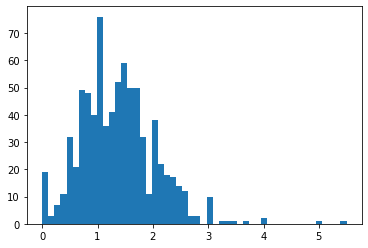

In [87]:
plt.hist(df['AF'], bins = 50)

(array([ 20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   5.,   5.,   9.,   5.,   1.,  36.,   4.,  19.,  36.,  30.,
         82.,  78.,  24., 105.,  40.,  62.,  31.,  20.,  34.,  13.,  31.,
         21.,  11.,  22.,   7.,   4.,   6.,   4.,   3.,   3.,   0.,   5.,
          0.,   0.,   1.,   1.,   0.,   3.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ]),
 <BarContainer object of 50 artists>)

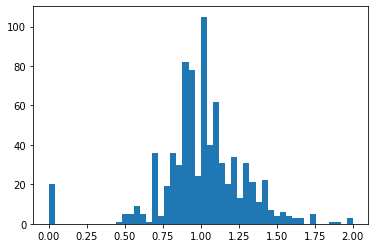

In [93]:
plt.hist((df['AF.1']**0.5), bins = 50)